In [103]:
# read cig_cancer_data.txt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read the data
data = pd.read_csv('cig_cancer_data.txt', sep=' ')


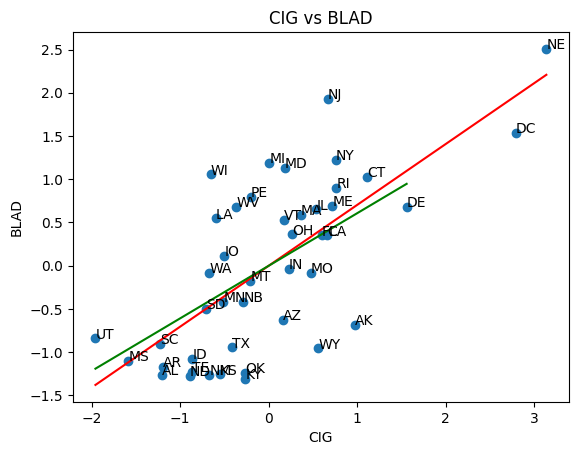

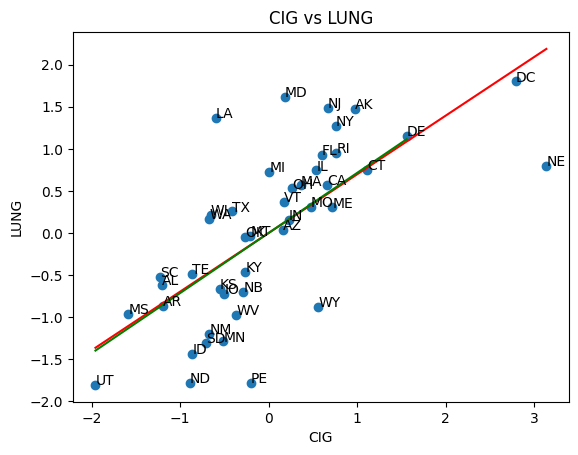

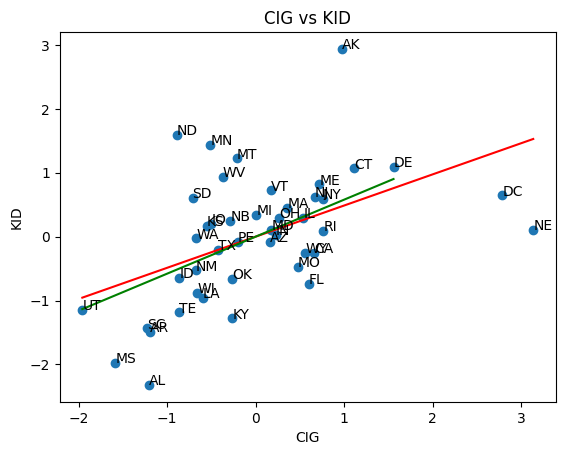

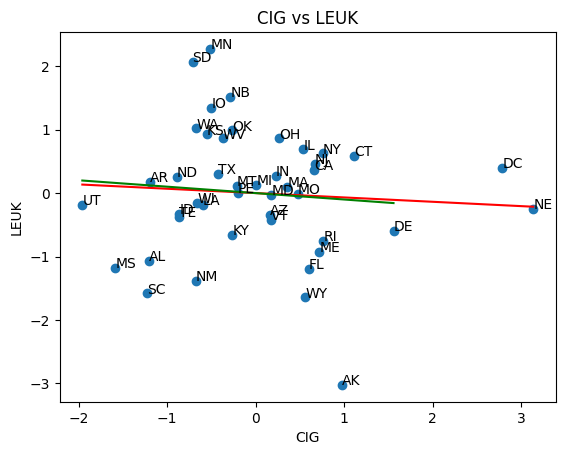

0.7036218594614423
0.6076263762900922
0.6974025049275291
0.7144799640258738
0.48738961703356476
0.5790799432330066
-0.06848122947663898
-0.10100873838467628


In [104]:
def plot_data(original_data, x, y, m):
    standardized_data = original_data.copy()
    standardized_data[x] = (original_data[x] - original_data[x].mean()) / original_data[x].std()
    standardized_data[y] = (original_data[y] - original_data[y].mean()) / original_data[y].std()

    plt.scatter(standardized_data[x], standardized_data[y])
    for i, txt in enumerate(standardized_data[m]):
        plt.annotate(txt, (standardized_data[x][i], standardized_data[y][i]))

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f'{x} vs {y}')

    # trend line, y = rx
    r = np.corrcoef(standardized_data[x], standardized_data[y])[0, 1]
    x_range = np.array([min(standardized_data[x]), max(standardized_data[x])])
    plt.plot(x_range, r * x_range, color='red')

    # exclude DC and NE
    filtered_data = standardized_data[~standardized_data['STATE'].isin(['DC', 'NE'])]
    r = np.corrcoef(filtered_data[x], filtered_data[y])[0, 1]
    x_range = np.array([min(filtered_data[x]), max(filtered_data[x])])
    plt.plot(x_range, r * x_range, color='green')

    plt.show()

plot_data(data, 'CIG', 'BLAD', 'STATE')
plot_data(data, 'CIG', 'LUNG', 'STATE')
plot_data(data, 'CIG', 'KID', 'STATE')
plot_data(data, 'CIG', 'LEUK', 'STATE')

def correlation(data, x, y, exclude=[]):
    filtered_data = data[np.isin(data['STATE'], exclude, invert=True)]
    return filtered_data[x].corr(filtered_data[y])

print(correlation(data, 'CIG', 'BLAD'))
print(correlation(data, 'CIG', 'BLAD', ['DC', 'NE']))
print(correlation(data, 'CIG', 'LUNG'))
print(correlation(data, 'CIG', 'LUNG', ['DC', 'NE']))
print(correlation(data, 'CIG', 'KID'))
print(correlation(data, 'CIG', 'KID', ['DC', 'NE']))
print(correlation(data, 'CIG', 'LEUK'))
print(correlation(data, 'CIG', 'LEUK', ['DC', 'NE']))

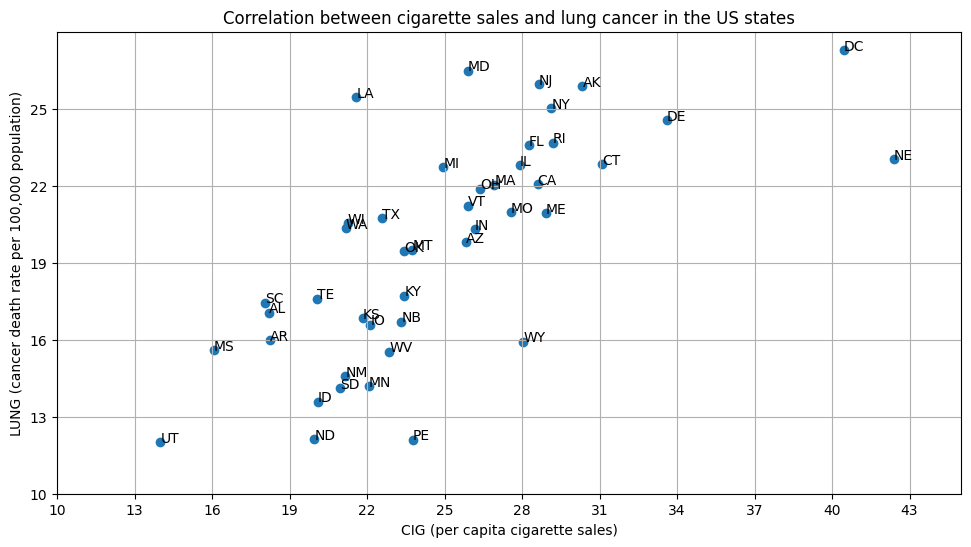

In [64]:
plt.figure(figsize=(35/3, 18/3))


plt.scatter(data['CIG'], data['LUNG'])
plt.xlabel('CIG (per capita cigarette sales)')
plt.ylabel('LUNG (cancer death rate per 100,000 population)')
plt.title('Correlation between cigarette sales and lung cancer in the US states')


# draw scatter plot, label them using the 'STATE' column
for i in range(len(data)):
    plt.annotate(data['STATE'][i], (data['CIG'][i], data['LUNG'][i]))

plt.xlim(10, 45)
plt.ylim(10, 28)

# set x axis resolution to 0.5
plt.xticks(np.arange(10, 45, 3))
plt.yticks(np.arange(10, 28, 3))

plt.grid(True)
plt.show()

y=0.697403x+(0.000000)


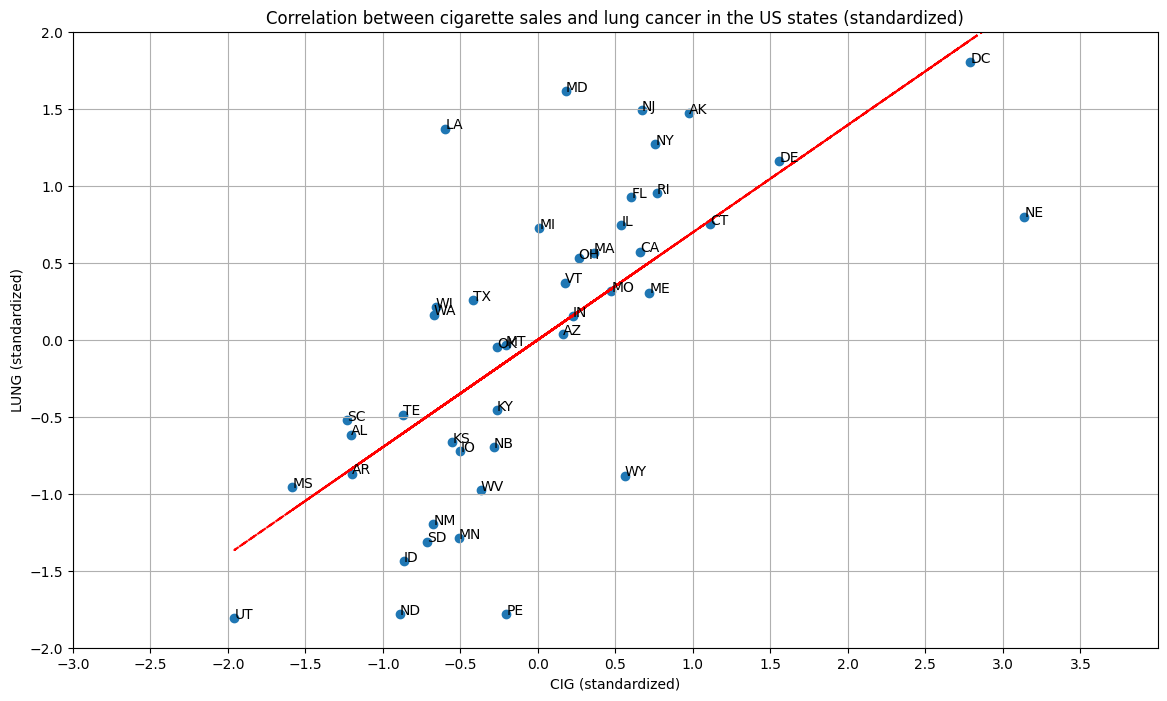

In [76]:
# standardize the columns
data['CIG'] = (data['CIG'] - data['CIG'].mean()) / data['CIG'].std()
data['LUNG'] = (data['LUNG'] - data['LUNG'].mean()) / data['LUNG'].std()

plt.figure(figsize=(14, 8))

plt.scatter(data['CIG'], data['LUNG'])
plt.xlabel('CIG (standardized)')
plt.ylabel('LUNG (standardized)')
plt.title('Correlation between cigarette sales and lung cancer in the US states (standardized)')


# draw scatter plot, label them using the 'STATE' column
for i in range(len(data)):
    plt.annotate(data['STATE'][i], (data['CIG'][i], data['LUNG'][i]))
    
# draw the trend line
z = np.polyfit(data['CIG'], data['LUNG'], 1)
p = np.poly1d(z)
plt.plot(data['CIG'], p(data['CIG']), "r--")

# print the formula
print("y=%.6fx+(%.6f)"%(z[0],z[1]))

plt.xlim(-3, 4)
plt.ylim(-2, 2)

# set x axis resolution to 0.5
plt.xticks(np.arange(-3, 4, 0.5))

plt.grid(True)
plt.show()

0.3521044886094656


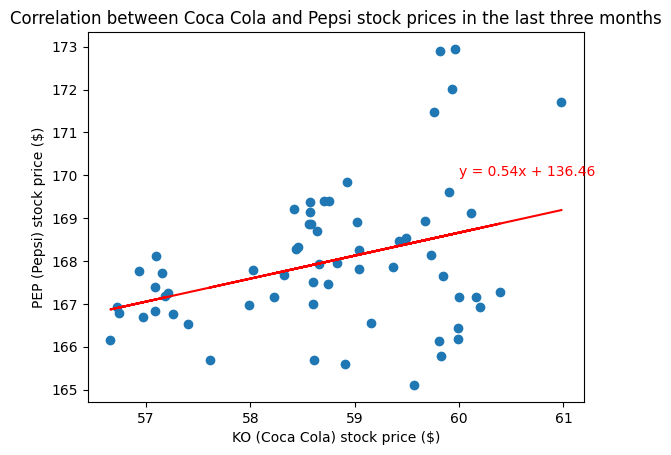

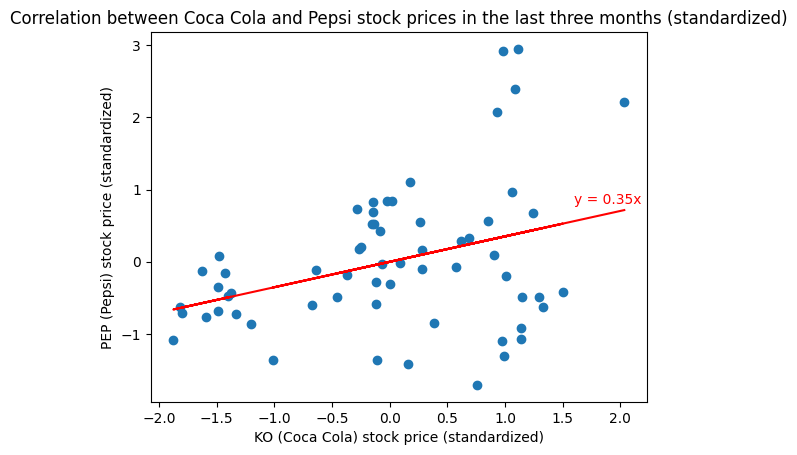

In [127]:
# open KO.csv and PEP.csv
ko = pd.read_csv('KO.csv')
pep = pd.read_csv('PEP.csv')

# find the 'close' column of KO and PEP
ko_close = ko['Close']
pep_close = pep['Close']

# only get last three months
today = pd.to_datetime('today')
three_months_ago = today - pd.DateOffset(months=3)

# convert the 'Date' column to datetime
ko['Date'] = pd.to_datetime(ko['Date'])
pep['Date'] = pd.to_datetime(pep['Date'])

# filter the data
ko_close = ko_close[ko['Date'] >= three_months_ago]
pep_close = pep_close[pep['Date'] >= three_months_ago]


corr = ko_close.corr(pep_close)

# find the correlation
print(corr)

# standard deviation
pep_std = pep_close.std()
pep_mean = pep_close.mean()

# trend line
z = np.polyfit(ko_close, pep_close, 1)
p = np.poly1d(z)

# draw the scatter plot
plt.scatter(ko_close, pep_close)
plt.xlabel('KO (Coca Cola) stock price ($)')
plt.ylabel('PEP (Pepsi) stock price ($)')


hat_ko_close = (ko_close - ko_close.mean()) / ko_close.std()

plt.plot(ko_close, hat_ko_close * pep_std * corr + pep_mean, color='red')

# put the line equation on the plot
plt.text(60, 170, f'y = {z[0]:.2f}x + {z[1]:.2f}', color='red')


plt.title('Correlation between Coca Cola and Pepsi stock prices in the last three months')
plt.show()


# also draw one for the standardized data
hat_ko_close_standard = (hat_ko_close - hat_ko_close.mean()) / hat_ko_close.std()
hat_pep_close_standard = (pep_close - pep_close.mean()) / pep_close.std()

plt.scatter(hat_ko_close_standard, hat_pep_close_standard)
plt.xlabel('KO (Coca Cola) stock price (standardized)')
plt.ylabel('PEP (Pepsi) stock price (standardized)')
plt.plot(hat_ko_close_standard, corr * hat_ko_close_standard, color='red')
plt.title('Correlation between Coca Cola and Pepsi stock prices in the last three months (standardized)')

plt.text(1.6, 0.8, f'y = {corr:.2f}x', color='red')

plt.show()
